IMPORT LIBRARIES

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
from google.colab import drive
import pandas
from sklearn import datasets

Kmeans clustering class

In [ ]:
from pandas.core.internals.blocks import astype_array_safe
from numpy.compat.py3k import abc_ABC
class K_Means:
    def __init__(self, k, tol, max_iter):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def random_centroid__init(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[random.randint(0, data.shape[0] - 1), :]

    def kMeans_plus_plus_centroid__init(self, data):
        self.centroids = {}
        self.centroids[0] = data[random.randint(0, data.shape[0] - 1)]
        q = 1
        while q < self.k:
            min_distances = []
            for featureset in data:
                distances = []
                for centroid in self.centroids:                 
                    distances.append(np.linalg.norm(featureset-self.centroids[centroid]))
                min_distances.append(min(distances))
            self.centroids[q] = data[min_distances.index(max(min_distances))]
            q = q + 1

    def plot_clusters(self, data, iteration):
        colors = ['red', 'green', 'blue', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'pink', 'gray', 'chocolate', 'peachpuff', 'rosybrown', 'darkviolet', 'acquamarine', 'bisque']
        plt.title('Iteration %d' %iteration)
        clear_output(wait = True)
        for classification in self.classifications:
            for featureset in self.classifications[classification]:
                plt.scatter(featureset[0], featureset[1], c=colors[classification])
        
        for centroid in self.centroids:
            plt.scatter(self.centroids[centroid][0], self.centroids[centroid][1],
                        marker="X", color="k", s = 200)
        plt.show()
                  
    def fit(self,data):
        for i in range(self.max_iter):
            self.classifications = {}

            for j in range(self.k):
                self.classifications[j] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                
            plt.figure(figsize=(9,9))
            plt.tick_params(axis='x', which='major', labelsize=19)
            plt.tick_params(axis='y', which='major', labelsize=19)
            plt.xlabel('PC1', labelpad = 6, fontsize = 22)
            plt.ylabel('PC2', labelpad = 6, fontsize = 22)
            self.plot_clusters(data, i)

            optimized = True
            for centroid in self.centroids:
                original_centroid = prev_centroids[centroid]
                current_centroid = self.centroids[centroid]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

    def SSD(self, data):
        SSD = 0
        for classification in self.classifications:
            for featureset in self.classifications[classification]:
                SSD = SSD + np.linalg.norm(featureset-self.centroids[classification]) ** 2            
        return SSD

    def silhouette_score(self, data):
        s = 0
        for classification in self.classifications:
            if len(self.classifications[classification]) == 1:
              continue
            else:
              for featureset in self.classifications[classification]:
                  a = []
                  b = []
                  for rest_classification in self.classifications:
                      if rest_classification == classification:
                        for rest_featureset in self.classifications[rest_classification]:
                            a.append(np.linalg.norm(featureset - rest_featureset))
                        aa = sum(a) / (len(a) - 1)
                      else:
                        b_classification = []
                        for rest_featureset in self.classifications[rest_classification]:
                            b_classification.append(np.linalg.norm(featureset-rest_featureset))
                        b.append(sum(b_classification) / (len(b_classification)))
                  if self.k > 1:  
                    bb = min(b)
                  else:
                    bb = 0
                  s = s + (bb - aa) / max(bb, aa)

        return s / data.shape[0]

MOUNT DRIVE

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


LOAD DATA

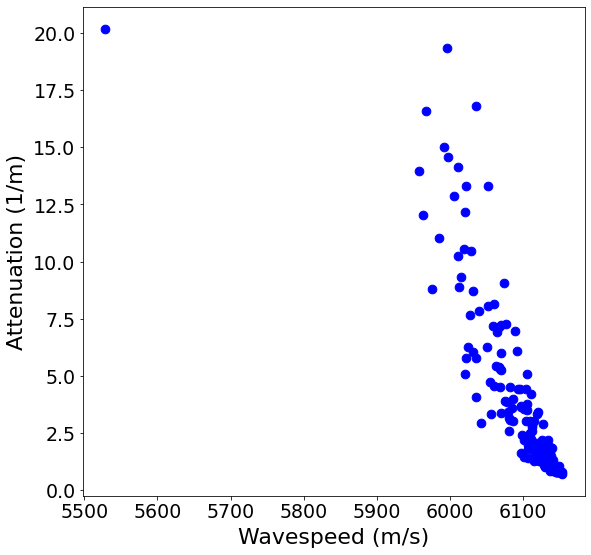

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/ESC597/Clustering/'

data = np.loadtxt('{}data_sim.txt'.format(path))
X = data
info = np.loadtxt('{}info_sim.txt'.format(path))
y = info
plt.figure(figsize = (9, 9))
plt.scatter(X[:,0], X[:,1], color = 'blue', s = 75)
plt.tick_params(axis='x', which='major', labelsize=19)
plt.tick_params(axis='y', which='major', labelsize=19)
plt.xlabel('PC1', labelpad = 6, fontsize = 22)
plt.ylabel('PC2', labelpad = 6, fontsize = 22)
plt.savefig('data.jpg', bbox = 'tight', dpi = 400)

INITIALIZE Kmeans MODEL

In [ ]:
k = 3
tol  = 1e-3
max_iter = 11

model = K_Means(k, tol, max_iter)

INITIALIZE CLUSTER CENTROIDS

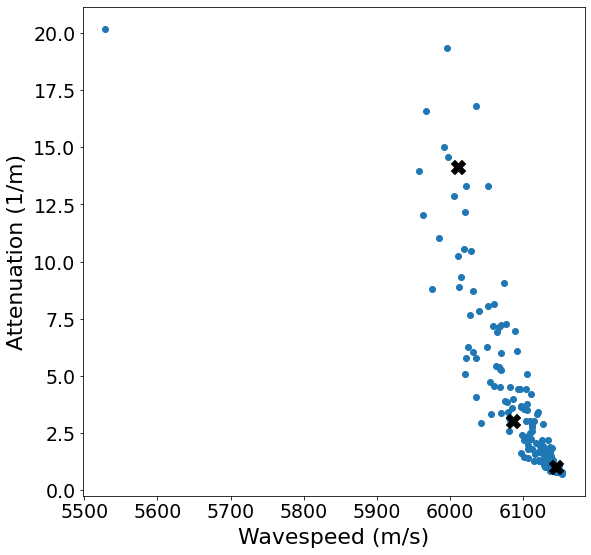

In [ ]:
model.random_centroid__init(X)

plt.figure(figsize = (9, 9))
plt.scatter(X[:,0], X[:,1])
plt.tick_params(axis='x', which='major', labelsize=19)
plt.tick_params(axis='y', which='major', labelsize=19)
plt.xlabel('PC1', labelpad = 6, fontsize = 22)
plt.ylabel('PC2', labelpad = 6, fontsize = 22)
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="X",  s = 200, color="k")
plt.savefig('intial_centroids.jpg', bbox = 'tight', dpi = 400)

FIND THE CLUSTERS

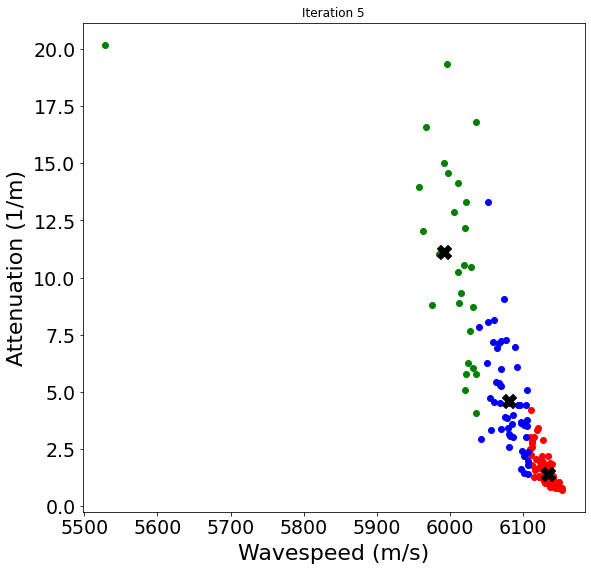

In [ ]:
model.fit(X)

CALCULATE SUM OF SQUARED DISTANCES

In [ ]:
model.SSD(X)

270135.8501152029

CALCULATE SILHOUETTE SCORE

In [ ]:
model.silhouette_score(X)

0.5878520248835213

MAKE ELBOW PLOT

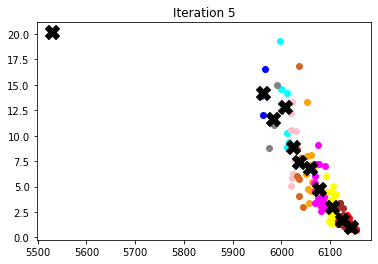

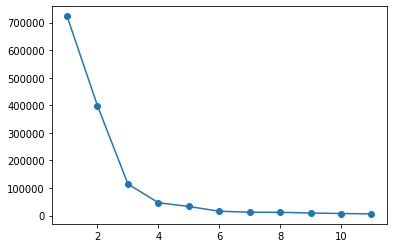

In [ ]:
k_range = np.linspace(1, 11, 11, dtype = int)
SSD = []
for i in range(len(k_range)):
    k = k_range[i]
    model = K_Means(k, tol, max_iter)
    model.kMeans_plus_plus_centroid__init(X)
    model.fit(X)
    SSD.append(model.SSD(X))

plt.plot(k_range, SSD, 'o-')

CALCULATE SILHOUETTE SCORE FOR DIFFERENT NUMBER OF CLUSTERS

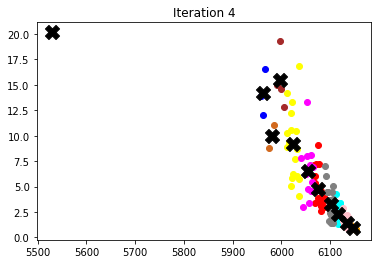

     k  silhouette_score
0    1         -1.000000
1    2          0.900404
2    3          0.666770
3    4          0.618833
4    5          0.592664
5    6          0.582291
6    7          0.606741
7    8          0.547212
8    9          0.538662
9   10          0.541241
10  11          0.507926


In [ ]:
k_range = np.linspace(1, 11, 11, dtype = int)
silhouette_score = []
for i in range(len(k_range)):
    k = k_range[i]
    model = K_Means(k, tol, max_iter)
    model.kMeans_plus_plus_centroid__init(X)
    model.fit(X)
    silhouette_score.append(model.silhouette_score(X))

df = pandas.DataFrame({"k": k_range, "silhouette_score": silhouette_score})
print(df)

COMPARISON OF CLUSTERING WITH TRUE LABELS

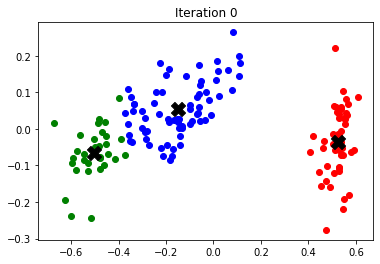

87.33333333333333


In [ ]:
k = int(max(y)) + 1
tol  = 1e-3
max_iter = 11

model = K_Means(k, tol, max_iter)
model.kMeans_plus_plus_centroid__init(X)
model.fit(X)

true_centroids = {}
for i in range(k):
    index = np.where(y == i)[0]
    true_centroids[i] = sum(X[index]) / index.shape[0]

q = []
for i in range(k):
    distances = []
    for j in range(k):
        distances.append(np.linalg.norm(model.centroids[i] - true_centroids[j]))
    q.append(distances.index(min(distances)))

for i in range(y.shape[0]):
    y[i] = q.index(y[i])

score = 0
for classification in model.classifications:
    for featureset in model.classifications[classification]:
        for i in range(X.shape[0]):
            if featureset[0] == X[i, 0] and featureset[1] == X[i, 1]:
              if classification == y[i]:
                score = score + 1

score = score * 100 / X.shape[0]
print('%f' %(score)+'% of the data points were clustered properly.')